In [ ]:
!nvidia-smi

Fri Aug  9 16:11:18 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 8
core id		: 0
cpu cores	: 4
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed bhi
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
ad

# YOLOv8 Installation

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.75 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (8 CPUs, 51.0 GB RAM, 33.6/201.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8s.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

/content
100% 21.5M/21.5M [00:00<00:00, 53.1MB/s]
Ultralytics YOLOv8.2.75 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s summary (fused): 168 layers, 11,156,544 parameters, 0 gradients, 28.6 GFLOPs

100% 104k/104k [00:00<00:00, 108MB/s]
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 handbag, 76.3ms
Speed: 9.0ms preprocess, 76.3ms inference, 759.4ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


/content


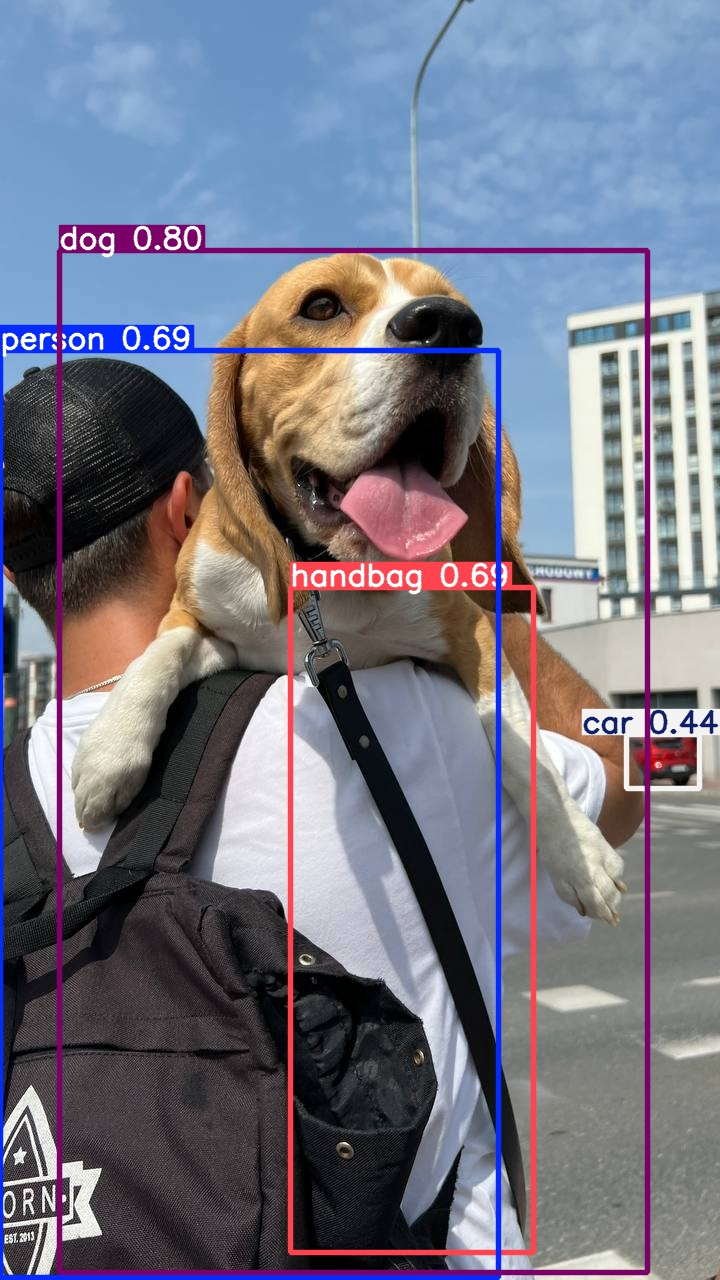

In [ ]:
%cd {HOME}
Image(filename='runs/detect/predict/dog.jpeg', height=600)

# Training

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="XsyxswdqkEg6IzstfJ2X")
project = rf.workspace("myfirstworkspace-jbsfo").project("truck-not-truck")
version = project.version(3)
dataset = version.download("yolov8")

/content/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.2 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.75, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Truck-Not-Truck-3 in yolov8:: 100%|██████████| 3080/3080 [00:00<00:00, 6876.02it/s]


In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data=/content/datasets/truck-detection/data.yaml epochs=100 imgsz=640 plots=True

/content
Ultralytics YOLOv8.2.72 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/truck-detection/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=

In [ ]:
!zip -r /content/train.zip /content/runs/detect/train

  adding: content/runs/detect/train/ (stored 0%)
  adding: content/runs/detect/train/train_batch6932.jpg (deflated 6%)
  adding: content/runs/detect/train/labels_correlogram.jpg (deflated 38%)
  adding: content/runs/detect/train/results.png (deflated 9%)
  adding: content/runs/detect/train/confusion_matrix.png (deflated 33%)
  adding: content/runs/detect/train/train_batch6931.jpg (deflated 5%)
  adding: content/runs/detect/train/labels.jpg (deflated 34%)
  adding: content/runs/detect/train/val_batch2_labels.jpg (deflated 6%)
  adding: content/runs/detect/train/results.csv (deflated 85%)
  adding: content/runs/detect/train/F1_curve.png (deflated 14%)
  adding: content/runs/detect/train/train_batch6930.jpg (deflated 5%)
  adding: content/runs/detect/train/P_curve.png (deflated 19%)
  adding: content/runs/detect/train/R_curve.png (deflated 14%)
  adding: content/runs/detect/train/val_batch1_pred.jpg (deflated 6%)
  adding: content/runs/detect/train/val_batch2_pred.jpg (deflated 5%)
  addi

In [ ]:
!yolo detect predict model=/content/runs/detect/train/weights/best.pt source=/content/datasets/truck-detection/test/images device=0

Ultralytics YOLOv8.2.72 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs

image 1/153 /content/datasets/truck-detection/test/images/adit_mp4-104_jpg.rf.bd98a858dbfcd28225760177116c60c7.jpg: 640x640 14 light-vehicles, 16.4ms
image 2/153 /content/datasets/truck-detection/test/images/adit_mp4-11_jpg.rf.4a9cb9bbe84a385c09d67b7756f714d8.jpg: 640x640 15 light-vehicles, 16.4ms
image 3/153 /content/datasets/truck-detection/test/images/adit_mp4-1367_jpg.rf.7bdf20d60bb826c50b9c95e349df14c9.jpg: 640x640 1 heavy-vehicle, 15 light-vehicles, 16.3ms
image 4/153 /content/datasets/truck-detection/test/images/adit_mp4-1370_jpg.rf.866a928133c211ae99a5a3bca05c8fb7.jpg: 640x640 1 heavy-vehicle, 15 light-vehicles, 16.3ms
image 5/153 /content/datasets/truck-detection/test/images/adit_mp4-1385_jpg.rf.77b326fb61902d31fca9c3d14d5b2073.jpg: 640x640 1 heavy-vehicle, 15 light-vehicles, 16.3ms
image 6/153 /content/datas

In [ ]:
!zip -r /content/predict_origin.zip /content/runs/detect/predict2

  adding: content/runs/detect/predict2/ (stored 0%)
  adding: content/runs/detect/predict2/adit_mp4-1763_jpg.rf.7b86470d24d6f2b84fa4c328299ae184.jpg (deflated 3%)
  adding: content/runs/detect/predict2/adit_mp4-1880_jpg.rf.1754582073b4767376089a9483cc6f0a.jpg (deflated 3%)
  adding: content/runs/detect/predict2/siang_15112021_1_mp4-79_jpg.rf.7c6a1b496f57dc6193e32cd187bc262b.jpg (deflated 4%)
  adding: content/runs/detect/predict2/pagi_16112021_mp4-61_jpg.rf.ee472ae08b46c53d23b2cf736f1b9262.jpg (deflated 4%)
  adding: content/runs/detect/predict2/aditganteng_mp4-581_jpg.rf.22b93e069b935c733b40ca18f39aea52.jpg (deflated 4%)
  adding: content/runs/detect/predict2/siang_15112021_1_mp4-200_jpg.rf.db9201c8477efccdc91c3dd49b9cf959.jpg (deflated 4%)
  adding: content/runs/detect/predict2/aditganteng_mp4-186_jpg.rf.b6571109a282180466245d19e91e4496.jpg (deflated 4%)
  adding: content/runs/detect/predict2/pagi_16112021_mp4-200_jpg.rf.8adfdae9049b2770841ba290d831a007.jpg (deflated 5%)
  adding: co

In [ ]:
!yolo detect val model=/content/runs/detect/train/weights/best.pt data=/content/datasets/truck-detection/data.yaml device=cpu

Ultralytics YOLOv8.2.72 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100% 154/154 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 10/10 [00:30<00:00,  3.03s/it]
                   all        154       1360      0.946       0.95      0.979      0.825
         heavy-vehicle         94        161      0.945      0.956      0.978      0.861
         light-vehicle        153       1199      0.947      0.944       0.98      0.788
Speed: 1.4ms preprocess, 188.5ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
!zip -r /content/val_origin_cpu.zip /content/runs/detect/val

  adding: content/runs/detect/val/ (stored 0%)
  adding: content/runs/detect/val/confusion_matrix.png (deflated 33%)
  adding: content/runs/detect/val/val_batch2_labels.jpg (deflated 6%)
  adding: content/runs/detect/val/F1_curve.png (deflated 13%)
  adding: content/runs/detect/val/P_curve.png (deflated 19%)
  adding: content/runs/detect/val/R_curve.png (deflated 13%)
  adding: content/runs/detect/val/val_batch1_pred.jpg (deflated 6%)
  adding: content/runs/detect/val/val_batch2_pred.jpg (deflated 6%)
  adding: content/runs/detect/val/confusion_matrix_normalized.png (deflated 31%)
  adding: content/runs/detect/val/val_batch0_pred.jpg (deflated 6%)
  adding: content/runs/detect/val/val_batch0_labels.jpg (deflated 7%)
  adding: content/runs/detect/val/val_batch1_labels.jpg (deflated 6%)
  adding: content/runs/detect/val/PR_curve.png (deflated 21%)


In [ ]:
!yolo detect val model=/content/runs/detect/train/weights/best.pt data=/content/datasets/truck-detection/data.yaml device=0

Ultralytics YOLOv8.2.72 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100% 154/154 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 10/10 [00:06<00:00,  1.63it/s]
                   all        154       1360      0.946       0.95      0.979      0.825
         heavy-vehicle         94        161      0.945      0.956      0.978      0.861
         light-vehicle        153       1199      0.947      0.944       0.98      0.788
Speed: 1.4ms preprocess, 9.0ms inference, 0.0ms loss, 24.2ms postprocess per image
Results saved to runs/detect/val2
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
!zip -r /content/val_origin_gpu.zip /content/runs/detect/val2

  adding: content/runs/detect/val2/ (stored 0%)
  adding: content/runs/detect/val2/confusion_matrix.png (deflated 33%)
  adding: content/runs/detect/val2/val_batch2_labels.jpg (deflated 6%)
  adding: content/runs/detect/val2/F1_curve.png (deflated 14%)
  adding: content/runs/detect/val2/P_curve.png (deflated 18%)
  adding: content/runs/detect/val2/R_curve.png (deflated 13%)
  adding: content/runs/detect/val2/val_batch1_pred.jpg (deflated 6%)
  adding: content/runs/detect/val2/val_batch2_pred.jpg (deflated 6%)
  adding: content/runs/detect/val2/confusion_matrix_normalized.png (deflated 31%)
  adding: content/runs/detect/val2/val_batch0_pred.jpg (deflated 6%)
  adding: content/runs/detect/val2/val_batch0_labels.jpg (deflated 7%)
  adding: content/runs/detect/val2/val_batch1_labels.jpg (deflated 6%)
  adding: content/runs/detect/val2/PR_curve.png (deflated 21%)


In [ ]:
!yolo detect predict model=/content/runs/detect/train/weights/best.pt source=/content/eg.mp4 device=0

Ultralytics YOLOv8.2.72 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs

video 1/1 (frame 1/480) /content/eg.mp4: 480x640 3 light-vehicles, 77.9ms
video 1/1 (frame 2/480) /content/eg.mp4: 480x640 3 light-vehicles, 13.0ms
video 1/1 (frame 3/480) /content/eg.mp4: 480x640 3 light-vehicles, 13.0ms
video 1/1 (frame 4/480) /content/eg.mp4: 480x640 3 light-vehicles, 13.0ms
video 1/1 (frame 5/480) /content/eg.mp4: 480x640 2 light-vehicles, 13.0ms
video 1/1 (frame 6/480) /content/eg.mp4: 480x640 2 light-vehicles, 13.0ms
video 1/1 (frame 7/480) /content/eg.mp4: 480x640 2 light-vehicles, 13.0ms
video 1/1 (frame 8/480) /content/eg.mp4: 480x640 2 light-vehicles, 13.0ms
video 1/1 (frame 9/480) /content/eg.mp4: 480x640 2 light-vehicles, 13.0ms
video 1/1 (frame 10/480) /content/eg.mp4: 480x640 2 light-vehicles, 13.0ms
video 1/1 (frame 11/480) /content/eg.mp4: 480x640 2 light-vehicles, 12.9ms
video 1/1 (fr

In [ ]:
!zip -r /content/predict_vid_eg1.zip /content/runs/detect/predict3

  adding: content/runs/detect/predict3/ (stored 0%)
  adding: content/runs/detect/predict3/eg.avi (deflated 1%)


In [ ]:
!yolo detect predict model=/content/runs/detect/train/weights/best.pt source=/content/eg2.mp4 device=0

Ultralytics YOLOv8.2.72 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs

video 1/1 (frame 1/360) /content/eg2.mp4: 480x640 (no detections), 75.6ms
video 1/1 (frame 2/360) /content/eg2.mp4: 480x640 (no detections), 13.0ms
video 1/1 (frame 3/360) /content/eg2.mp4: 480x640 (no detections), 13.0ms
video 1/1 (frame 4/360) /content/eg2.mp4: 480x640 3 heavy-vehicles, 12.9ms
video 1/1 (frame 5/360) /content/eg2.mp4: 480x640 2 heavy-vehicles, 13.0ms
video 1/1 (frame 6/360) /content/eg2.mp4: 480x640 2 heavy-vehicles, 12.9ms
video 1/1 (frame 7/360) /content/eg2.mp4: 480x640 2 heavy-vehicles, 13.0ms
video 1/1 (frame 8/360) /content/eg2.mp4: 480x640 2 heavy-vehicles, 13.0ms
video 1/1 (frame 9/360) /content/eg2.mp4: 480x640 1 heavy-vehicle, 12.9ms
video 1/1 (frame 10/360) /content/eg2.mp4: 480x640 1 heavy-vehicle, 12.9ms
video 1/1 (frame 11/360) /content/eg2.mp4: 480x640 1 heavy-vehicle, 13.0ms
video 1/

In [ ]:
!zip -r /content/predict_vid_eg2.zip /content/runs/detect/predict4

  adding: content/runs/detect/predict4/ (stored 0%)
  adding: content/runs/detect/predict4/eg2.avi (deflated 1%)



# TensorRT

In [ ]:
model = YOLO("/content/runs/detect/train/weights/best.pt")
model.export(
    format="engine",
    dynamic=True,
    batch=16,
    workspace=4,
    int8=True,
    data="/content/datasets/truck-detection/data.yaml",
)

# Load the exported TensorRT INT8 model
model = YOLO("/content/runs/detect/train/weights/best.engine", task="detect")

# Run inference
result = model.predict("/content/datasets/truck-detection/test/images")

WARNING ⚠️ TensorRT requires GPU export, automatically assigning device=0
Ultralytics YOLOv8.2.72 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs

PyTorch: starting from '/content/runs/detect/train/weights/best.pt' with input shape (16, 3, 640, 640) BCHW and output shape(s) (16, 6, 8400) (21.5 MB)

ONNX: starting export with onnx 1.16.2 opset 17...
ONNX: export success ✅ 4.1s, saved as '/content/runs/detect/train/weights/best.onnx' (42.5 MB)

TensorRT: starting export with TensorRT 10.2.0.post1...
TensorRT: input "images" with shape(-1, 3, -1, -1) DataType.FLOAT
TensorRT: output "output0" with shape(-1, 6, -1) DataType.FLOAT
TensorRT: building INT8 engine as /content/runs/detect/train/weights/best.engine
TensorRT: collecting INT8 calibration images from 'data=/content/datasets/truck-detection/data.yaml'


Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]

TensorRT: WARNING ⚠️ >300 images recommended for INT8 calibration, found 154 images.


TensorRT: export success ✅ 343.0s, saved as '/content/runs/detect/train/weights/best.engine' (14.0 MB)

Export complete (343.6s)
Results saved to /content/runs/detect/train/weights
Predict:         yolo predict task=detect model=/content/runs/detect/train/weights/best.engine imgsz=640 int8 
Validate:        yolo val task=detect model=/content/runs/detect/train/weights/best.engine imgsz=640 data=/content/datasets/truck-detection/data.yaml int8 
Visualize:       https://netron.app
Loading /content/runs/detect/train/weights/best.engine for TensorRT inference...

image 1/153 /content/datasets/truck-detection/test/images/adit_mp4-104_jpg.rf.bd98a858dbfcd28225760177116c60c7.jpg: 640x640 11 light-vehicles, 4.7ms
image 2/153 /content/datasets/truck-detection/test/images/adit_mp4-11_jpg.rf.4a9cb9bbe84a385c09d67b7756f714d8.jpg: 640x640 12 light-vehicles, 4.7ms
image 3/153 /content/datasets/truck-detection/test/images/adit_mp4-1367_jpg.rf.7bdf20d60bb826c50b9c95e349df14c9.jpg: 640x640 1 heavy-vehi

In [ ]:
!yolo detect val model=/content/runs/detect/train/weights/best.engine data=/content/datasets/truck-detection/data.yaml device=0

Ultralytics YOLOv8.2.72 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Loading /content/runs/detect/train/weights/best.engine for TensorRT inference...
[08/04/2024-20:39:55] [TRT] [I] Loaded engine size: 13 MiB
[08/04/2024-20:39:55] [TRT] [I] [MemUsageChange] TensorRT-managed allocation in IExecutionContext creation: CPU +0, GPU +2400, now: CPU 0, GPU 2439 (MiB)
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100% 154/154 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 10/10 [00:11<00:00,  1.12s/it]
                   all        154       1360      0.947      0.943      0.976      0.798
         heavy-vehicle         94        161      0.938      0.944      0.975       0.84
         light-vehicle        153       1199      0.955      0.942      0.977      0.756
Speed: 1.4ms preprocess, 2.1ms inference, 0.0ms loss, 32.0ms postprocess per image
Resul

In [ ]:
!zip -r /content/val_quantized_int8_gpu.zip /content/runs/detect/val18

  adding: content/runs/detect/val18/ (stored 0%)
  adding: content/runs/detect/val18/confusion_matrix.png (deflated 33%)
  adding: content/runs/detect/val18/val_batch2_labels.jpg (deflated 2%)
  adding: content/runs/detect/val18/F1_curve.png (deflated 13%)
  adding: content/runs/detect/val18/P_curve.png (deflated 18%)
  adding: content/runs/detect/val18/R_curve.png (deflated 13%)
  adding: content/runs/detect/val18/val_batch1_pred.jpg (deflated 2%)
  adding: content/runs/detect/val18/val_batch2_pred.jpg (deflated 2%)
  adding: content/runs/detect/val18/confusion_matrix_normalized.png (deflated 32%)
  adding: content/runs/detect/val18/val_batch0_pred.jpg (deflated 3%)
  adding: content/runs/detect/val18/val_batch0_labels.jpg (deflated 2%)
  adding: content/runs/detect/val18/val_batch1_labels.jpg (deflated 2%)
  adding: content/runs/detect/val18/PR_curve.png (deflated 21%)


In [ ]:
!yolo detect predict model=/content/runs/detect/train/weights/best.engine source=/content/datasets/truck-detection/test/images device=0

Ultralytics YOLOv8.2.72 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Loading /content/runs/detect/train/weights/best.engine for TensorRT inference...
[08/04/2024-20:41:33] [TRT] [I] Loaded engine size: 13 MiB
[08/04/2024-20:41:33] [TRT] [I] [MemUsageChange] TensorRT-managed allocation in IExecutionContext creation: CPU +0, GPU +2400, now: CPU 0, GPU 2439 (MiB)

image 1/153 /content/datasets/truck-detection/test/images/adit_mp4-104_jpg.rf.bd98a858dbfcd28225760177116c60c7.jpg: 640x640 11 light-vehicles, 4.8ms
image 2/153 /content/datasets/truck-detection/test/images/adit_mp4-11_jpg.rf.4a9cb9bbe84a385c09d67b7756f714d8.jpg: 640x640 12 light-vehicles, 4.8ms
image 3/153 /content/datasets/truck-detection/test/images/adit_mp4-1367_jpg.rf.7bdf20d60bb826c50b9c95e349df14c9.jpg: 640x640 1 heavy-vehicle, 15 light-vehicles, 4.7ms
image 4/153 /content/datasets/truck-detection/test/images/adit_mp4-1370_jpg.rf.866a928133c211ae99a5a3bca05c8fb7.jpg: 640x640 1 heavy-vehicle, 14 light-veh

In [ ]:
!zip -r /content/predict_quantized_int8_gpu.zip /content/runs/detect/predict7

  adding: content/runs/detect/predict7/ (stored 0%)
  adding: content/runs/detect/predict7/adit_mp4-1763_jpg.rf.7b86470d24d6f2b84fa4c328299ae184.jpg (deflated 3%)
  adding: content/runs/detect/predict7/adit_mp4-1880_jpg.rf.1754582073b4767376089a9483cc6f0a.jpg (deflated 3%)
  adding: content/runs/detect/predict7/siang_15112021_1_mp4-79_jpg.rf.7c6a1b496f57dc6193e32cd187bc262b.jpg (deflated 4%)
  adding: content/runs/detect/predict7/pagi_16112021_mp4-61_jpg.rf.ee472ae08b46c53d23b2cf736f1b9262.jpg (deflated 4%)
  adding: content/runs/detect/predict7/aditganteng_mp4-581_jpg.rf.22b93e069b935c733b40ca18f39aea52.jpg (deflated 4%)
  adding: content/runs/detect/predict7/siang_15112021_1_mp4-200_jpg.rf.db9201c8477efccdc91c3dd49b9cf959.jpg (deflated 4%)
  adding: content/runs/detect/predict7/aditganteng_mp4-186_jpg.rf.b6571109a282180466245d19e91e4496.jpg (deflated 4%)
  adding: content/runs/detect/predict7/pagi_16112021_mp4-200_jpg.rf.8adfdae9049b2770841ba290d831a007.jpg (deflated 5%)
  adding: co

In [ ]:
model = YOLO("/content/runs/detect/train/weights/best.pt")
model.export(
    format="engine",
    dynamic=True,
    batch=16,
    workspace=4,
    half=True,
    data="/content/datasets/truck-detection/data.yaml",
)


WARNING ⚠️ TensorRT requires GPU export, automatically assigning device=0
Ultralytics YOLOv8.2.72 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs

PyTorch: starting from '/content/runs/detect/train/weights/best.pt' with input shape (16, 3, 640, 640) BCHW and output shape(s) (16, 6, 8400) (21.5 MB)

ONNX: starting export with onnx 1.16.2 opset 17...
ONNX: export success ✅ 3.8s, saved as '/content/runs/detect/train/weights/best.onnx' (42.5 MB)

TensorRT: starting export with TensorRT 10.2.0.post1...
TensorRT: input "images" with shape(-1, 3, -1, -1) DataType.FLOAT
TensorRT: output "output0" with shape(-1, 6, -1) DataType.FLOAT
TensorRT: building FP16 engine as /content/runs/detect/train/weights/best.engine
TensorRT: export success ✅ 499.8s, saved as '/content/runs/detect/train/weights/best.engine' (23.3 MB)

Export complete (500.4s)
Results saved to /content/runs/detect/train/weights
Predict

'/content/runs/detect/train/weights/best.engine'

In [ ]:
!yolo detect val model=/content/runs/detect/train/weights/best.engine data=/content/datasets/truck-detection/data.yaml device=0

Ultralytics YOLOv8.2.72 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Loading /content/runs/detect/train/weights/best.engine for TensorRT inference...
[08/04/2024-21:03:24] [TRT] [I] Loaded engine size: 23 MiB
[08/04/2024-21:03:24] [TRT] [I] [MemUsageChange] TensorRT-managed allocation in IExecutionContext creation: CPU +0, GPU +4321, now: CPU 0, GPU 4362 (MiB)
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100% 154/154 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 10/10 [00:11<00:00,  1.13s/it]
                   all        154       1360      0.924      0.968      0.979      0.817
         heavy-vehicle         94        161      0.912      0.969      0.977      0.852
         light-vehicle        153       1199      0.936      0.967      0.981      0.783
Speed: 1.6ms preprocess, 3.2ms inference, 0.0ms loss, 27.5ms postprocess per image
Resul

In [ ]:
!zip -r /content/val_quantized_fp16_gpu.zip /content/runs/detect/val19

  adding: content/runs/detect/val19/ (stored 0%)
  adding: content/runs/detect/val19/confusion_matrix.png (deflated 34%)
  adding: content/runs/detect/val19/val_batch2_labels.jpg (deflated 2%)
  adding: content/runs/detect/val19/F1_curve.png (deflated 13%)
  adding: content/runs/detect/val19/P_curve.png (deflated 17%)
  adding: content/runs/detect/val19/R_curve.png (deflated 14%)
  adding: content/runs/detect/val19/val_batch1_pred.jpg (deflated 2%)
  adding: content/runs/detect/val19/val_batch2_pred.jpg (deflated 2%)
  adding: content/runs/detect/val19/confusion_matrix_normalized.png (deflated 31%)
  adding: content/runs/detect/val19/val_batch0_pred.jpg (deflated 3%)
  adding: content/runs/detect/val19/val_batch0_labels.jpg (deflated 2%)
  adding: content/runs/detect/val19/val_batch1_labels.jpg (deflated 2%)
  adding: content/runs/detect/val19/PR_curve.png (deflated 20%)


In [ ]:
!yolo detect predict model=/content/runs/detect/train/weights/best.engine source=/content/datasets/truck-detection/test/images device=0

Ultralytics YOLOv8.2.72 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Loading /content/runs/detect/train/weights/best.engine for TensorRT inference...
[08/04/2024-21:04:18] [TRT] [I] Loaded engine size: 23 MiB
[08/04/2024-21:04:18] [TRT] [I] [MemUsageChange] TensorRT-managed allocation in IExecutionContext creation: CPU +0, GPU +4321, now: CPU 0, GPU 4362 (MiB)

image 1/153 /content/datasets/truck-detection/test/images/adit_mp4-104_jpg.rf.bd98a858dbfcd28225760177116c60c7.jpg: 640x640 14 light-vehicles, 6.6ms
image 2/153 /content/datasets/truck-detection/test/images/adit_mp4-11_jpg.rf.4a9cb9bbe84a385c09d67b7756f714d8.jpg: 640x640 15 light-vehicles, 6.6ms
image 3/153 /content/datasets/truck-detection/test/images/adit_mp4-1367_jpg.rf.7bdf20d60bb826c50b9c95e349df14c9.jpg: 640x640 1 heavy-vehicle, 15 light-vehicles, 6.5ms
image 4/153 /content/datasets/truck-detection/test/images/adit_mp4-1370_jpg.rf.866a928133c211ae99a5a3bca05c8fb7.jpg: 640x640 1 heavy-vehicle, 15 light-veh

In [ ]:
!zip -r /content/predict_quantized_fp16_gpu.zip /content/runs/detect/predict9

  adding: content/runs/detect/predict9/ (stored 0%)
  adding: content/runs/detect/predict9/adit_mp4-1763_jpg.rf.7b86470d24d6f2b84fa4c328299ae184.jpg (deflated 3%)
  adding: content/runs/detect/predict9/adit_mp4-1880_jpg.rf.1754582073b4767376089a9483cc6f0a.jpg (deflated 3%)
  adding: content/runs/detect/predict9/siang_15112021_1_mp4-79_jpg.rf.7c6a1b496f57dc6193e32cd187bc262b.jpg (deflated 4%)
  adding: content/runs/detect/predict9/pagi_16112021_mp4-61_jpg.rf.ee472ae08b46c53d23b2cf736f1b9262.jpg (deflated 4%)
  adding: content/runs/detect/predict9/aditganteng_mp4-581_jpg.rf.22b93e069b935c733b40ca18f39aea52.jpg (deflated 4%)
  adding: content/runs/detect/predict9/siang_15112021_1_mp4-200_jpg.rf.db9201c8477efccdc91c3dd49b9cf959.jpg (deflated 4%)
  adding: content/runs/detect/predict9/aditganteng_mp4-186_jpg.rf.b6571109a282180466245d19e91e4496.jpg (deflated 4%)
  adding: content/runs/detect/predict9/pagi_16112021_mp4-200_jpg.rf.8adfdae9049b2770841ba290d831a007.jpg (deflated 5%)
  adding: co

# OpenVINO


In [ ]:
# Load a YOLOv8n PyTorch model
model = YOLO("/content/runs/detect/train/weights/best.pt")

# Export the model
model.export(format="openvino", imgsz=640, int8=True, batch=16, workspace=4, data="/content/datasets/truck-detection/data.yaml") # creates 'yolov8n_openvino_model/'
# Load the exported OpenVINO model
ov_model = YOLO("/content/runs/detect/train/weights/best_int8_openvino_model/")

# Run inference
results = ov_model("/content/datasets/truck-detection/test/images")

Ultralytics YOLOv8.2.72 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs

PyTorch: starting from '/content/runs/detect/train/weights/best.pt' with input shape (16, 3, 640, 640) BCHW and output shape(s) (16, 6, 8400) (21.5 MB)
requirements: Ultralytics requirement ['openvino>=2024.0.0'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 MB 19.9 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 4.7s, installed 1 package: ['openvino>=2024.0.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


OpenVINO: starting export with openvino 2024.3.0-16041-1e3b88e4e3f-releases/2024/3...
requirements: Ultralytics requirement ['nncf>=2.8.0'] not found, attempting AutoUpdate...
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.4/68.4 kB 5.

Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]

OpenVINO: WARNING ⚠️ >300 images recommended for INT8 calibration, found 154 images.


INFO:nncf:24 ignored nodes were found by patterns in the NNCFGraph
INFO:nncf:1 ignored nodes were found by types in the NNCFGraph
INFO:nncf:Not adding activation input quantizer for operation: 166 __module.model.22.dfl/aten::view/Reshape
INFO:nncf:Not adding activation input quantizer for operation: 167 __module.model.22/aten::sigmoid/Sigmoid
INFO:nncf:Not adding activation input quantizer for operation: 180 __module.model.22.dfl/aten::transpose/Transpose
INFO:nncf:Not adding activation input quantizer for operation: 191 __module.model.22.dfl/aten::softmax/Softmax
INFO:nncf:Not adding activation input quantizer for operation: 201 __module.model.22.dfl.conv/aten::_convolution/Convolution
INFO:nncf:Not adding activation input quantizer for operation: 208 __module.model.22.dfl/aten::view/Reshape_1
INFO:nncf:Not adding activation input quantizer for operation: 225 __module.model.22/aten::sub/Subtract
INFO:nncf:Not adding activation input quantizer for operation: 226 __module.model.22/aten:

Output()

Output()

OpenVINO: export success ✅ 96.5s, saved as '/content/runs/detect/train/weights/best_int8_openvino_model/' (11.2 MB)

Export complete (103.7s)
Results saved to /content/runs/detect/train/weights
Predict:         yolo predict task=detect model=/content/runs/detect/train/weights/best_int8_openvino_model imgsz=640 int8 
Validate:        yolo val task=detect model=/content/runs/detect/train/weights/best_int8_openvino_model imgsz=640 data=/content/datasets/truck-detection/data.yaml int8 
Visualize:       https://netron.app
Loading /content/runs/detect/train/weights/best_int8_openvino_model for OpenVINO inference...
Using OpenVINO LATENCY mode for batch=1 inference...

image 1/153 /content/datasets/truck-detection/test/images/adit_mp4-104_jpg.rf.bd98a858dbfcd28225760177116c60c7.jpg: 640x640 14 light-vehicles, 132.9ms
image 2/153 /content/datasets/truck-detection/test/images/adit_mp4-11_jpg.rf.4a9cb9bbe84a385c09d67b7756f714d8.jpg: 640x640 15 light-vehicles, 73.9ms
image 3/153 /content/datasets

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"
#ANSI_X3.4-1968

In [ ]:
!yolo detect predict model=/content/runs/detect/train/weights/best_int8_openvino_model source=/content/datasets/truck-detection/test/images

Ultralytics YOLOv8.2.72 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
Loading /content/runs/detect/train/weights/best_int8_openvino_model for OpenVINO inference...
Using OpenVINO LATENCY mode for batch=1 inference...

image 1/153 /content/datasets/truck-detection/test/images/adit_mp4-104_jpg.rf.bd98a858dbfcd28225760177116c60c7.jpg: 640x640 14 light-vehicles, 151.7ms
image 2/153 /content/datasets/truck-detection/test/images/adit_mp4-11_jpg.rf.4a9cb9bbe84a385c09d67b7756f714d8.jpg: 640x640 15 light-vehicles, 114.6ms
image 3/153 /content/datasets/truck-detection/test/images/adit_mp4-1367_jpg.rf.7bdf20d60bb826c50b9c95e349df14c9.jpg: 640x640 1 heavy-vehicle, 14 light-vehicles, 107.0ms
image 4/153 /content/datasets/truck-detection/test/images/adit_mp4-1370_jpg.rf.866a928133c211ae99a5a3bca05c8fb7.jpg: 640x640 1 heavy-vehicle, 15 light-vehicles, 106.2ms
image 5/153 /content/datasets/truck-detection/test/images/adit_mp4-1385_jpg.rf.77b326fb61902d31fca9c3d14d5b2073.jpg: 640x640 1 he

In [ ]:
!zip -r /content/predict_quantized_int8_cpu.zip /content/runs/detect/predict3

  adding: content/runs/detect/predict3/ (stored 0%)
  adding: content/runs/detect/predict3/adit_mp4-1763_jpg.rf.7b86470d24d6f2b84fa4c328299ae184.jpg (deflated 3%)
  adding: content/runs/detect/predict3/adit_mp4-1880_jpg.rf.1754582073b4767376089a9483cc6f0a.jpg (deflated 3%)
  adding: content/runs/detect/predict3/siang_15112021_1_mp4-79_jpg.rf.7c6a1b496f57dc6193e32cd187bc262b.jpg (deflated 4%)
  adding: content/runs/detect/predict3/pagi_16112021_mp4-61_jpg.rf.ee472ae08b46c53d23b2cf736f1b9262.jpg (deflated 4%)
  adding: content/runs/detect/predict3/aditganteng_mp4-581_jpg.rf.22b93e069b935c733b40ca18f39aea52.jpg (deflated 4%)
  adding: content/runs/detect/predict3/siang_15112021_1_mp4-200_jpg.rf.db9201c8477efccdc91c3dd49b9cf959.jpg (deflated 4%)
  adding: content/runs/detect/predict3/aditganteng_mp4-186_jpg.rf.b6571109a282180466245d19e91e4496.jpg (deflated 4%)
  adding: content/runs/detect/predict3/pagi_16112021_mp4-200_jpg.rf.8adfdae9049b2770841ba290d831a007.jpg (deflated 5%)
  adding: co

In [ ]:
!yolo detect val model=/content/runs/detect/train/weights/best_int8_openvino_model data=/content/datasets/truck-detection/data.yaml

Ultralytics YOLOv8.2.72 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
Loading /content/runs/detect/train/weights/best_int8_openvino_model for OpenVINO inference...
Using OpenVINO LATENCY mode for batch=1 inference...
Setting batch=16 input of shape (16, 3, 640, 640)
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100% 154/154 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 10/10 [00:19<00:00,  1.93s/it]
                   all        154       1360      0.927      0.961      0.978      0.814
         heavy-vehicle         94        161      0.914      0.963      0.976      0.848
         light-vehicle        153       1199       0.94      0.958      0.979       0.78
Speed: 2.2ms preprocess, 77.8ms inference, 0.0ms loss, 21.6ms postprocess per image
Results saved to runs/detect/val3
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
!zip -r /content/val_quantized_int8_cpu.zip /content/runs/detect/val3

  adding: content/runs/detect/val3/ (stored 0%)
  adding: content/runs/detect/val3/confusion_matrix.png (deflated 33%)
  adding: content/runs/detect/val3/val_batch2_labels.jpg (deflated 2%)
  adding: content/runs/detect/val3/F1_curve.png (deflated 13%)
  adding: content/runs/detect/val3/P_curve.png (deflated 17%)
  adding: content/runs/detect/val3/R_curve.png (deflated 14%)
  adding: content/runs/detect/val3/val_batch1_pred.jpg (deflated 3%)
  adding: content/runs/detect/val3/val_batch2_pred.jpg (deflated 2%)
  adding: content/runs/detect/val3/confusion_matrix_normalized.png (deflated 31%)
  adding: content/runs/detect/val3/val_batch0_pred.jpg (deflated 3%)
  adding: content/runs/detect/val3/val_batch0_labels.jpg (deflated 2%)
  adding: content/runs/detect/val3/val_batch1_labels.jpg (deflated 2%)
  adding: content/runs/detect/val3/PR_curve.png (deflated 20%)


In [ ]:
# Load the YOLOv8 model
model = YOLO("/content/runs/detect/train/weights/best.pt")

# Export the model to ONNX format
model.export(format="onnx")  # creates 'yolov8n.onnx'

Ultralytics YOLOv8.2.72 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs

PyTorch: starting from '/content/runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 6, 8400) (21.5 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 279.8 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 4.9s, installed 1 package: ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.16.2 opset 17...
ONNX: export success ✅ 5.8s, saved as '/content/runs/detect/train/weights/best.onnx' (42.6 MB)

Export complete (7.5s)
Results saved to /content/runs/detect/train/weights
Predict:         yolo predict task=detect model=/content/runs/detect/train/weights/best.onnx imgsz=640  
Validate:        yolo val

'/content/runs/detect/train/weights/best.onnx'

In [ ]:
%pip install openvino-dev

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 42.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 90.9 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.3
    Uninstalling networkx-3.3:
      Successfully uninstalled networkx-3.3


In [ ]:
!mo --input_model /content/runs/detect/train/weights/best.onnx --output_dir /content/runs/detect/train/weights/best_openvino_model --compress_to_fp16

[ INFO ] MO command line tool is considered as the legacy conversion API as of OpenVINO 2023.2 release.
In 2025.0 MO command line tool and openvino.tools.mo.convert_model() will be removed. Please use OpenVINO Model Converter (OVC) or openvino.convert_model(). OVC represents a lightweight alternative of MO and provides simplified model conversion API. 
Find more information about transition from MO to OVC at https://docs.openvino.ai/2023.2/openvino_docs_OV_Converter_UG_prepare_model_convert_model_MO_OVC_transition.html
[ INFO ] Generated IR will be compressed to FP16. If you get lower accuracy, please consider disabling compression explicitly by adding argument --compress_to_fp16=False.
Find more information about compression to FP16 at https://docs.openvino.ai/2023.0/openvino_docs_MO_DG_FP16_Compression.html
[ SUCCESS ] Generated IR version 11 model.
[ SUCCESS ] XML file: /content/runs/detect/train/weights/best_openvino_model/best.xml
[ SUCCESS ] BIN file: /content/runs/detect/train/w

In [ ]:
!yolo detect val model=/content/runs/detect/train/weights/best_openvino_model data=/content/datasets/truck-detection/data.yaml

Ultralytics YOLOv8.2.72 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Loading /content/runs/detect/train/weights/best_openvino_model for OpenVINO inference...
Using OpenVINO LATENCY mode for batch=1 inference...
Setting batch=1 input of shape (1, 3, 640, 640)
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100% 154/154 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 154/154 [00:19<00:00,  7.98it/s]
                   all        154       1360      0.923      0.968      0.978      0.819
         heavy-vehicle         94        161      0.912      0.969      0.977      0.854
         light-vehicle        153       1199      0.935      0.967       0.98      0.783
Speed: 2.7ms preprocess, 114.4ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/val17
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
!zip -r /content/val_quantized_fp16_cpu.zip /content/runs/detect/val8

  adding: content/runs/detect/val8/ (stored 0%)
  adding: content/runs/detect/val8/confusion_matrix.png (deflated 34%)
  adding: content/runs/detect/val8/val_batch2_labels.jpg (deflated 2%)
  adding: content/runs/detect/val8/F1_curve.png (deflated 13%)
  adding: content/runs/detect/val8/P_curve.png (deflated 17%)
  adding: content/runs/detect/val8/R_curve.png (deflated 14%)
  adding: content/runs/detect/val8/val_batch1_pred.jpg (deflated 2%)
  adding: content/runs/detect/val8/val_batch2_pred.jpg (deflated 2%)
  adding: content/runs/detect/val8/confusion_matrix_normalized.png (deflated 31%)
  adding: content/runs/detect/val8/val_batch0_pred.jpg (deflated 2%)
  adding: content/runs/detect/val8/val_batch0_labels.jpg (deflated 2%)
  adding: content/runs/detect/val8/val_batch1_labels.jpg (deflated 2%)
  adding: content/runs/detect/val8/PR_curve.png (deflated 20%)


In [ ]:
!yolo detect predict model=/content/runs/detect/train/weights/best_openvino_model source=/content/datasets/truck-detection/test/images

Ultralytics YOLOv8.2.72 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
Loading /content/runs/detect/train/weights/best_openvino_model for OpenVINO inference...
Using OpenVINO LATENCY mode for batch=1 inference...

image 1/153 /content/datasets/truck-detection/test/images/adit_mp4-104_jpg.rf.bd98a858dbfcd28225760177116c60c7.jpg: 640x640 14 light-vehicles, 140.0ms
image 2/153 /content/datasets/truck-detection/test/images/adit_mp4-11_jpg.rf.4a9cb9bbe84a385c09d67b7756f714d8.jpg: 640x640 15 light-vehicles, 118.4ms
image 3/153 /content/datasets/truck-detection/test/images/adit_mp4-1367_jpg.rf.7bdf20d60bb826c50b9c95e349df14c9.jpg: 640x640 1 heavy-vehicle, 15 light-vehicles, 116.3ms
image 4/153 /content/datasets/truck-detection/test/images/adit_mp4-1370_jpg.rf.866a928133c211ae99a5a3bca05c8fb7.jpg: 640x640 1 heavy-vehicle, 15 light-vehicles, 107.9ms
image 5/153 /content/datasets/truck-detection/test/images/adit_mp4-1385_jpg.rf.77b326fb61902d31fca9c3d14d5b2073.jpg: 640x640 1 heavy-v

In [ ]:
!zip -r /content/predict_quantized_fp16_cpu.zip /content/runs/detect/predict6

  adding: content/runs/detect/predict6/ (stored 0%)
  adding: content/runs/detect/predict6/adit_mp4-1763_jpg.rf.7b86470d24d6f2b84fa4c328299ae184.jpg (deflated 3%)
  adding: content/runs/detect/predict6/adit_mp4-1880_jpg.rf.1754582073b4767376089a9483cc6f0a.jpg (deflated 3%)
  adding: content/runs/detect/predict6/siang_15112021_1_mp4-79_jpg.rf.7c6a1b496f57dc6193e32cd187bc262b.jpg (deflated 4%)
  adding: content/runs/detect/predict6/pagi_16112021_mp4-61_jpg.rf.ee472ae08b46c53d23b2cf736f1b9262.jpg (deflated 4%)
  adding: content/runs/detect/predict6/aditganteng_mp4-581_jpg.rf.22b93e069b935c733b40ca18f39aea52.jpg (deflated 4%)
  adding: content/runs/detect/predict6/siang_15112021_1_mp4-200_jpg.rf.db9201c8477efccdc91c3dd49b9cf959.jpg (deflated 4%)
  adding: content/runs/detect/predict6/aditganteng_mp4-186_jpg.rf.b6571109a282180466245d19e91e4496.jpg (deflated 4%)
  adding: content/runs/detect/predict6/pagi_16112021_mp4-200_jpg.rf.8adfdae9049b2770841ba290d831a007.jpg (deflated 5%)
  adding: co

In [ ]:
# Load a YOLOv8n PyTorch model
model = YOLO("/content/runs/detect/train/weights/best.pt")

# Export the model
model.export(format="openvino", imgsz=640, half=True, batch=16, workspace=4, data="/content/datasets/truck-detection/data.yaml") # creates 'yolov8n_openvino_model/'
# Load the exported OpenVINO model
#ov_model = YOLO("/content/runs/detect/train/weights/best_int8_openvino_model/")

# Run inference
#results = ov_model("/content/datasets/truck-detection/test/images")

Ultralytics YOLOv8.2.72 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs

PyTorch: starting from '/content/runs/detect/train/weights/best.pt' with input shape (16, 3, 640, 640) BCHW and output shape(s) (16, 6, 8400) (21.5 MB)

OpenVINO: starting export with openvino 2024.3.0-16041-1e3b88e4e3f-releases/2024/3...
OpenVINO: export success ✅ 16.1s, saved as '/content/runs/detect/train/weights/best_openvino_model/' (21.6 MB)

Export complete (23.1s)
Results saved to /content/runs/detect/train/weights
Predict:         yolo predict task=detect model=/content/runs/detect/train/weights/best_openvino_model imgsz=640 half 
Validate:        yolo val task=detect model=/content/runs/detect/train/weights/best_openvino_model imgsz=640 data=/content/datasets/truck-detection/data.yaml half 
Visualize:       https://netron.app


'/content/runs/detect/train/weights/best_openvino_model'

# Post Static Quantization

In [ ]:
!yolo detect val model=/content/yolov8s.pt data=/content/datasets/truck-detection/data.yaml device=0 imgsz=640 batch=16 conf=0.25 iou=0.6

Ultralytics YOLOv8.2.75 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s summary (fused): 168 layers, 11,156,544 parameters, 0 gradients, 28.6 GFLOPs
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100% 154/154 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 10/10 [00:08<00:00,  1.22it/s]
                   all        154       1360          0          0          0          0
Speed: 1.6ms preprocess, 18.4ms inference, 0.1ms loss, 28.1ms postprocess per image
Results saved to runs/detect/val7
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
# Before Quantization
!yolo detect val model=/content/best.pt data=/content/datasets/truck-detection/data.yaml device=0 imgsz=640 batch=16 conf=0.25 iou=0.6

Ultralytics YOLOv8.2.75 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs
Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 834, in entrypoint
    getattr(model, mode)(**overrides)  # default args from model
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 644, in val
    validator(model=self.model)
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py", line 115, in decorate_context
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/validator.py", line 143, in __call__
    self.data = check_det_dataset(self.args.data)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/data/utils.py", line 269, in check_det_dataset
    file = check_file(d

In [ ]:
# Converting .pt to .onnx
model = YOLO('/content/best.pt')
model.export(format = 'onnx')

Ultralytics YOLOv8.2.75 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs

PyTorch: starting from '/content/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 6, 8400) (21.5 MB)

ONNX: starting export with onnx 1.16.2 opset 17...
ONNX: export success ✅ 1.1s, saved as '/content/best.onnx' (42.6 MB)

Export complete (2.9s)
Results saved to /content
Predict:         yolo predict task=detect model=/content/best.onnx imgsz=640  
Validate:        yolo val task=detect model=/content/best.onnx imgsz=640 data=/content/datasets/truck-detection/data.yaml  
Visualize:       https://netron.app


'/content/best.onnx'

In [ ]:
!pip install onnxruntime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 50.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 8.9 MB/s eta 0:00:00


# Pruning

In [ ]:
!pip uninstall torch-pruning -y

In [ ]:
!pip install torch-pruning==0.2.4

  Using cached torch_pruning-0.2.4-py3-none-any.whl.metadata (7.8 kB)
Using cached torch_pruning-0.2.4-py3-none-any.whl (13 kB)
